# Importando as Bibliotecas e o Dataframe

## Bibliotecas

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings

# Configurando o pandas para não limitar a visualização da base
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando para evitar mensagens de erro
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

## Importando e tratando a base

### Dicionário dos dados
Detalhes das colunas:
1. VendorID
Descrição: Identificador do fornecedor do táxi.
2. tpep_pickup_datetime
Descrição: A data e a hora em que a viagem começou.
3. tpep_dropoff_datetime
Descrição: A data e a hora em que a viagem terminou.
4. passenger_count
Descrição: O número de passageiros na viagem.
5. trip_distance
Descrição: A distância da viagem em milhas.
6. RatecodeID
Descrição: Código que indica a tarifa usada para a viagem.
7. store_and_fwd_flag
Descrição: Indica se os dados da viagem foram mantidos na memória do veículo antes de serem enviados ao fornecedor (S/N).
8. PULocationID
Descrição: ID do local onde a viagem começou.
9. DOLocationID
Descrição: ID do local onde a viagem terminou.
10. payment_type
Descrição: Método de pagamento usado para a viagem.
1: Cartão de crédito
2: Dinheiro
3: Sem cobrança
4: Disputa
5: Desconhecido
6: Viagem cancelada
11. fare_amount
Descrição: Tarifa básica para a viagem.

12. extra
Descrição: Cobranças adicionais (para viagens noturnas ou em horários de pico).
13. mta_tax
Descrição: Imposto obrigatório imposto pela Autoridade de Transporte Metropolitano.
14. tip_amount
Descrição: Gorjeta dada ao motorista.
15. tolls_amount
Descrição: Taxas de pedágio incorridas durante a viagem.
16. improvement_surcharge
Descrição: Uma taxa fixa para a melhoria dos serviços de táxi.
17. total_amount
Descrição: Valor total pago pela viagem (soma de todas as cobranças).
18. congestion_surcharge
Descrição: Cobrança adicional para viagens em áreas congestionadas.



### Importando o dataframe

In [2]:
# Importando a base de dados
df = pd.read_csv('Taxi_Trip_Data.csv')

# Análisando as primeiras linhas
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### Análisando o dataframe
**Verificações iniciais**
* Dimensões da tabela
* Temos dados faltantes?
* Temos dados duplicados?
* O formato de cada coluna está certo?
* Precisaremos tratar algum dado?

In [3]:
# Dimensões da tabela
linhas_df_original = df.shape[0]
colunas_df_original = df.shape[1]
print(f'Linhas: {linhas_df_original}')
print(f'Colunas: {colunas_df_original}')

Linhas: 6500000
Colunas: 18


In [4]:
# Verificando dados nulos
df.isnull().sum()

,0
VendorID,79229
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,79229
trip_distance,0
RatecodeID,79229
store_and_fwd_flag,79229
PULocationID,0
DOLocationID,0
payment_type,79229


In [5]:
# Removendo linhas vazias
df.dropna(inplace=True)

In [6]:
# Verificando dados duplicados
df.duplicated().sum()

0

In [7]:
# Dimensões da tabela após a limpeza
linhas_df_tratado = df.shape[0]
colunas_df_tratado = df.shape[1]
print(f'Linhas: {linhas_df_tratado}')
print(f'Colunas: {colunas_df_tratado}')

# Análisando o quanto perdemos após a limpeza dos dados (nulos / duplicados)
linhas_perdidas = (linhas_df_original - linhas_df_tratado) / linhas_df_original
print(f'Linhas perdidas: {linhas_perdidas:.2%}')

Linhas: 6420771
Colunas: 18
Linhas perdidas: 1.22%


In [8]:
# Verificando valores únicos
df.nunique()

,0
VendorID,2
tpep_pickup_datetime,2163530
tpep_dropoff_datetime,2166722
passenger_count,10
trip_distance,4507
RatecodeID,7
store_and_fwd_flag,2
PULocationID,260
DOLocationID,262
payment_type,5


In [9]:
# Análise estatistica básica do dataframe
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06,6.420771e+06
mean,1.669844e+00,1.515719e+00,2.847706e+00,1.059781e+00,1.649503e+02,1.629337e+02,1.270356e+00,1.248321e+01,1.095778e+00,4.937940e-01,2.208626e+00,3.336652e-01,2.979615e-01,1.845419e+01,2.299007e+00
std,4.702692e-01,1.151972e+00,3.751903e+00,8.095474e-01,6.543477e+01,6.981345e+01,4.741247e-01,1.194054e+01,1.250947e+00,6.884369e-02,2.760219e+00,1.741491e+00,3.407645e-02,1.461723e+01,7.018693e-01
min,1.000000e+00,0.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.628800e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [10]:
# Verificando o tipo de cada coluna
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [12]:
# Converte o DataFrame do Pandas para Polars
df_pl = pl.from_pandas(df)

# Converte as colunas de data no Polars
df_pl = df_pl.with_columns([
    pl.col("tpep_pickup_datetime").str.to_datetime("%m/%d/%Y %I:%M:%S %p"),
    pl.col("tpep_dropoff_datetime").str.to_datetime("%m/%d/%Y %I:%M:%S %p")
])

# Converte de volta para Pandas
df = df_pl.to_pandas()

In [13]:
# Verificando o periodo da base
print(f'Período da base: {df["tpep_pickup_datetime"].min()} até {df["tpep_pickup_datetime"].max()}')

Período da base: 2003-01-01 00:07:17 até 2021-01-02 01:12:10


In [14]:
# Criando coluna de duração da viagem
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Criando colunas de data
df['day'] = df['tpep_pickup_datetime'].dt.day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['year'] = df['tpep_pickup_datetime'].dt.year
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday

# Criando coluna binaria se houve pagamento da gorjeta ou não
df['tip'] = df['tip_amount'].apply(lambda x: 1 if x > 0 else 0)

In [15]:
# Convertendo a coluna 'store_and_fwd_flag' para binário
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [16]:
# Convertendo colunas em categoricas
df['VendorID'] = df['VendorID'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')

In [17]:
df.dtypes

,0
VendorID,category
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,category
store_and_fwd_flag,category
PULocationID,int64
DOLocationID,int64
payment_type,category


#### Análisando qual é o período que temos no dataset

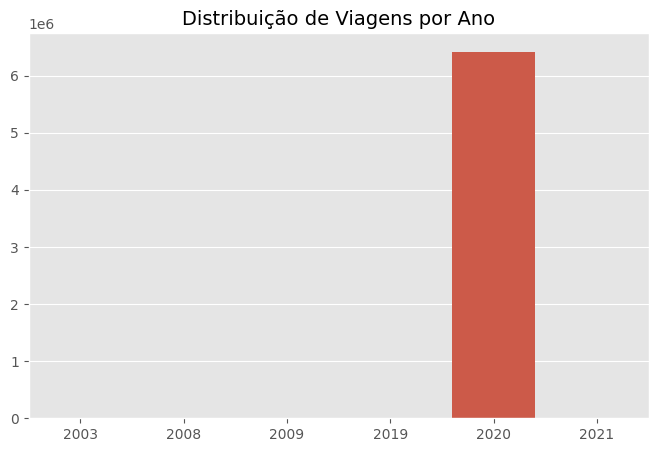

In [18]:
# Verificando a quantidade de corridas por ano
df_ano = df.groupby('year', as_index=False)['total_amount'].count()

# Gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='year', y='total_amount', data=df_ano)
plt.title('Distribuição de viagens por ano')

# Configurando o visual
ax.set_title('Distribuição de Viagens por Ano', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

Text(0.5, 0, '')

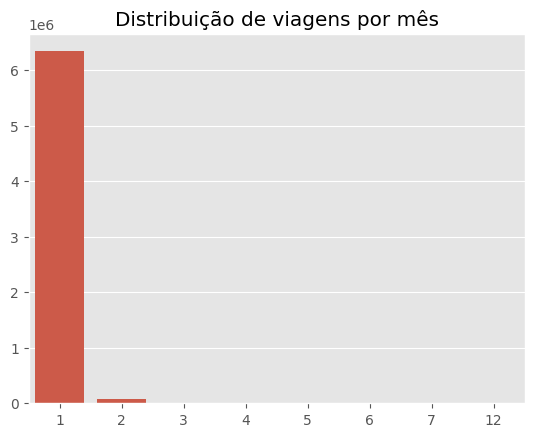

In [19]:
# Verificando a distribuição de viagens por mês
df_mes = df.groupby('month', as_index=False)['total_amount'].count()

# Gráfico de barras
ax = sns.barplot(x='month', y='total_amount', data=df_mes)
plt.title('Distribuição de viagens por mês')

ax.set_ylabel('')
ax.set_xlabel('')

*Entendendo que apenas o ano de 2020 e o mês de janeiro tem uma quantidade consideravel de dados, vamos manter apenas os dados de 2020.01*

In [20]:
# Filtrando apenas os dados de 2020 e janeiro
df = df[(df['year'] == 2020) & (df['month'] == 1)]

In [21]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,day,month,year,hour,weekday,tip
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000,1,1,2020,0,2,1
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667,1,1,2020,0,2,1
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333,1,1,2020,0,2,1
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000,1,1,2020,0,2,1
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000,1,1,2020,0,2,0


### Análisando possíveis Outliers
**Dúvidas iniciais**
* Existem corridas sem passageiro?
* Temos corridas com a distância percorrida igual a zero?
* Existem corridas com tarifa básica negativa ou igual a zero?
* Existem possibilidades de haver cobranças adicionais com valor negativo?
* Existem corridas corridas com imposto negativo?
* Existem corridas com gorjetas negativas?
* Existem corridas com duração igual a zero?
* Existem valores pagos na corrida negativos ou iguais a zero?

#### Verificando as colunas com possíveis outliers

In [22]:
# Análisando o minimo, máximo e média de algumas colunas
colunas = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'trip_duration', 'total_amount']

# Criando um loop para verificar os dados de cada coluna
for coluna in colunas:
    minimo = df[coluna].min()
    maximo = df[coluna].max()
    media = df[coluna].mean()
    mediana = df[coluna].median()
    moda = df[coluna].mode()[0]
    print(f'{coluna}: Mínimo: {minimo} | Máximo: {maximo} | Média: {media} | Mediana: {mediana} | Moda: {moda}')
    print('')


passenger_count: Mínimo: 0.0 | Máximo: 9.0 | Média: 1.5153442244790825 | Mediana: 1.0 | Moda: 1.0

trip_distance: Mínimo: -22.18 | Máximo: 262.88 | Média: 2.848617090648218 | Mediana: 1.6 | Moda: 0.9

fare_amount: Mínimo: -1238.0 | Máximo: 4265.0 | Média: 12.494782646621628 | Mediana: 9.0 | Moda: 6.0

extra: Mínimo: -27.0 | Máximo: 113.01 | Média: 1.0980102495684205 | Mediana: 0.5 | Moda: 0.0

mta_tax: Mínimo: -0.5 | Máximo: 30.8 | Média: 0.4938031249369043 | Mediana: 0.5 | Moda: 0.5

tip_amount: Mínimo: -91.0 | Máximo: 1100.0 | Média: 2.2112472111734784 | Mediana: 1.95 | Moda: 0.0

trip_duration: Mínimo: -2770.366666666667 | Máximo: 8525.116666666667 | Média: 15.820827665243234 | Mediana: 10.4 | Moda: 6.5

total_amount: Mínimo: -1242.3 | Máximo: 4268.3 | Média: 18.47155176112501 | Mediana: 14.16 | Moda: 10.3



#### Outliers - Tarifa Básica

In [23]:
# Verificando possiveis outliers na coluna de tarifa básica
amount = df['fare_amount'][df['fare_amount'] <= 0].count()
print(f'Quantidade de viagens com valores de tarifa básica negativa: {amount}')

Quantidade de viagens com valores de tarifa básica negativa: 22181


In [24]:
# Removendo viagens com tarifa básica negativa
df = df[df['fare_amount'] > 0]

Text(0.5, 1.0, 'Boxplot - Valor tarifa básica')

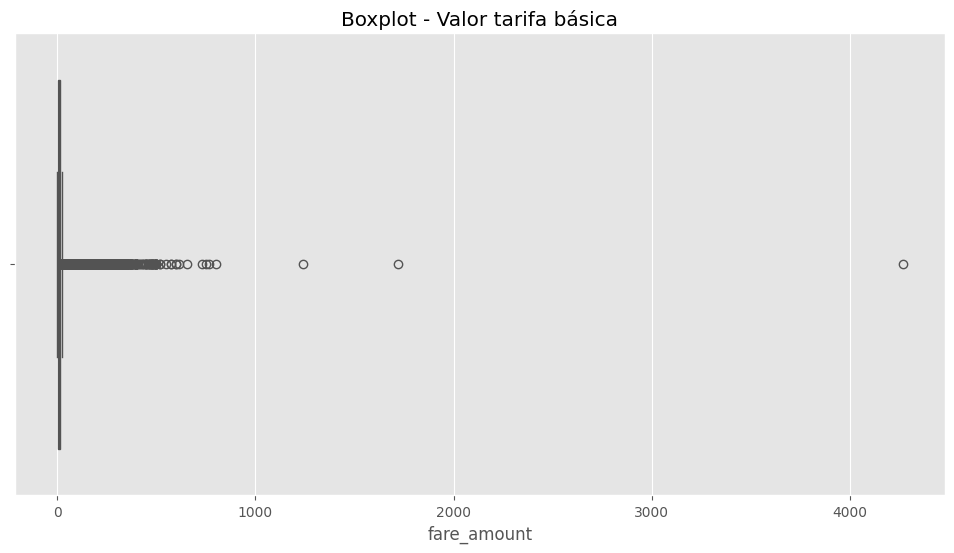

In [25]:
# Boxplot - Valor de tarifa básica
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot - Valor tarifa básica')

In [26]:
# Verificando a distribuição da coluna 'tarifa básica'
q1 = df['fare_amount'].quantile(0.25)  # Primeiro quartil (Q1)
q2 = df['fare_amount'].quantile(0.50)  # Segundo quartil (Q2) - Mediana
q3 = df['fare_amount'].quantile(0.75)  # Terceiro quartil (Q3)
q_99p = df['fare_amount'].quantile(0.995)  # 99% dos dados

print(f'Q1: {q1:.2f}, Q2 (Mediana): {q2:.2f}, Q3: {q3:.2f}, 99,5%: {q_99p:.2f}')

Q1: 6.50, Q2 (Mediana): 9.00, Q3: 13.50, 99,5%: 65.00


In [27]:
# Entendendo até quando o valor de tarifa cobrado segue uma normalidade
outliers_duration = df['fare_amount'][df['fare_amount'] > q_99p].count()

print(f'Linhas com tárifa acima de {q_99p}: {outliers_duration} | {outliers_duration / df.shape[0]:.2%}')

Linhas com tárifa acima de 65.0: 27291 | 0.43%


In [28]:
# Removendo viagens com tarifa acima de $52
df = df[df['fare_amount'] <= q_99p]

Text(0.5, 1.0, 'Boxplot - Valor Total da Viagem')

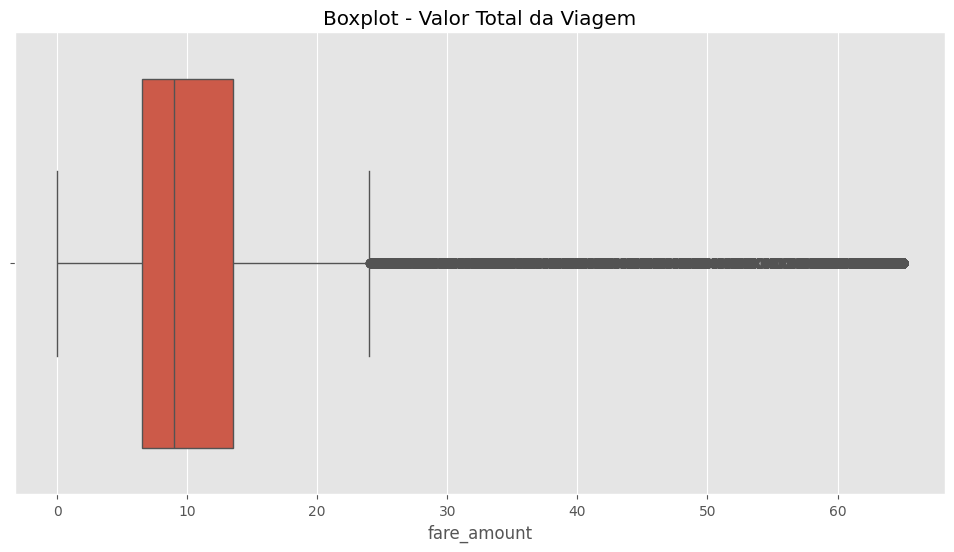

In [29]:
# Boxplot - Valor Total da Viagem
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot - Valor Total da Viagem')

#### Outliers - Valor da Viagem

In [30]:
# Verificando possiveis outliers na coluna de total da viagem
amount = df['total_amount'][df['total_amount'] <= 0].count()
print(f'Quantidade de viagens com valores negativos: {amount}')

Quantidade de viagens com valores negativos: 0


In [31]:
# Removendo viagens com valores negativos
df = df[df['total_amount'] > 0]

Text(0.5, 1.0, 'Boxplot - Valor Total da Viagem')

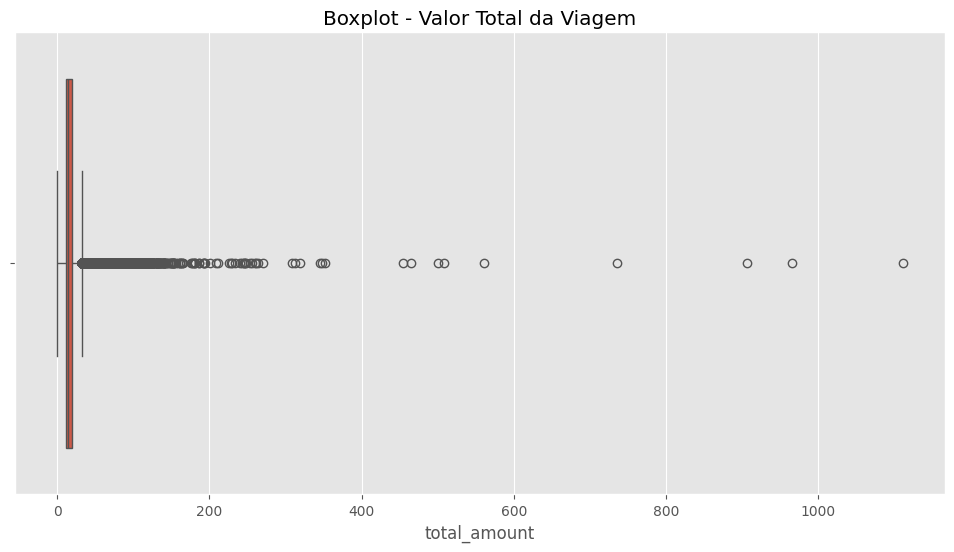

In [32]:
# Boxplot - Valor Total da Viagem
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot - Valor Total da Viagem')

*Podemos ver que ainda temos muitos outliers*

* Como estão cada quartil?
* Que valor podemos considerar como outliers?
* Até quantos minutos podemos considerar como uma viagem normal?
* Podemos assumir uma régua para retirar valores outliers?

In [33]:
# Verificando a distribuição da coluna 'total_amount'
q1 = df['total_amount'].quantile(0.25)  # Primeiro quartil (Q1)
q2 = df['total_amount'].quantile(0.50)  # Segundo quartil (Q2) - Mediana
q3 = df['total_amount'].quantile(0.75)  # Terceiro quartil (Q3)
q_99p = df['total_amount'].quantile(0.995)  # 99% dos dados

print(f'Q1: {q1:.2f}, Q2 (Mediana): {q2:.2f}, Q3: {q3:.2f}, 99,5%: {q_99p:.2f}')

Q1: 11.16, Q2 (Mediana): 14.16, Q3: 19.56, 99,5%: 76.77


In [34]:
# Entendendo até quando o valor cobrado segue uma normalidade
outliers_duration = df['total_amount'][df['total_amount'] > q_99p].count()

print(f'Linhas com valor cobrado mais que {q_99p}: {outliers_duration} | {outliers_duration / df.shape[0]:.2%}')

Linhas com valor cobrado mais que 76.77: 29697 | 0.47%


In [35]:
# Removendo viagens com distância maior que 50 milhas
df = df[df['total_amount'] <= q_99p]

Text(0.5, 1.0, 'Boxplot - Valor da Viagem - Após Limpeza')

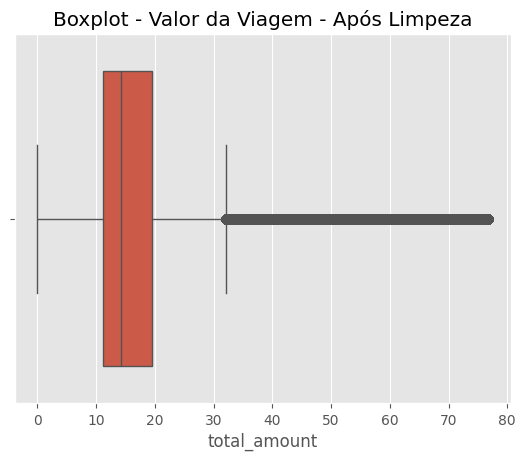

In [36]:
# Boxplot - Distância da Viagem
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot - Valor da Viagem - Após Limpeza')

#### Outliers - Extra

In [37]:
# Verificando possiveis outliers na coluna de extras
amount = df['extra'][df['extra'] < 0].count()
print(f'Quantidade de tarifas extra com valores negativos: {amount}')

Quantidade de tarifas extra com valores negativos: 2


In [38]:
# Removendo viagens com tarifas extras negativas
df = df[df['extra'] >= 0]

Text(0.5, 1.0, 'Boxplot - Valor de Tarifa Extra')

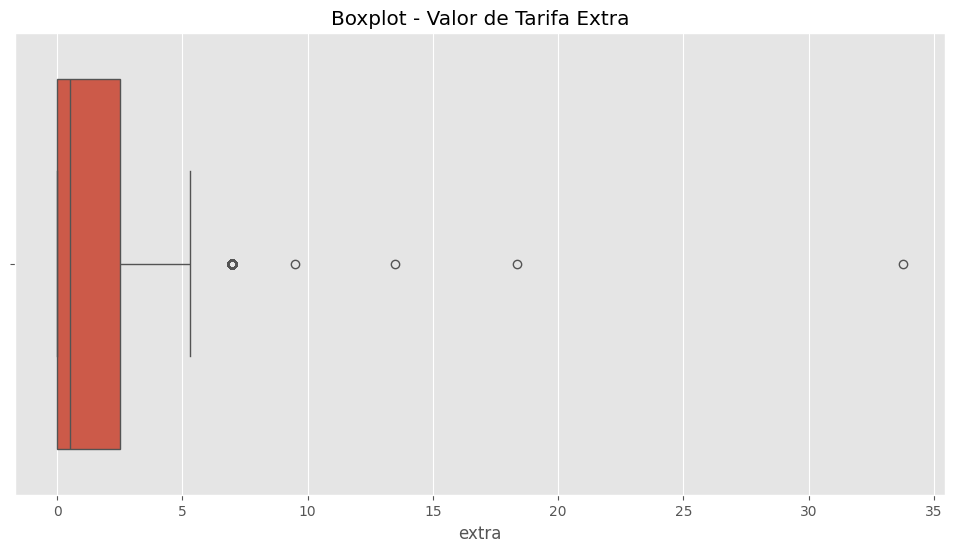

In [39]:
# Boxplot - Valor Total da Viagem
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['extra'])
plt.title('Boxplot - Valor de Tarifa Extra')

#### Outliers - Duração da viagem

In [40]:
# Verificando possiveis outliers na coluna de duração da viagem
duration = df['trip_duration'][df['trip_duration'] <= 0].count()
print(f'Quantidade de viagens com duração menor ou igual a zero: {duration}')

Quantidade de viagens com duração menor ou igual a zero: 3639


In [41]:
# Removendo viagens com duração menor ou igual a zero
df = df[df['trip_duration'] > 0]

Text(0.5, 1.0, 'Boxplot - Duração da Viagem')

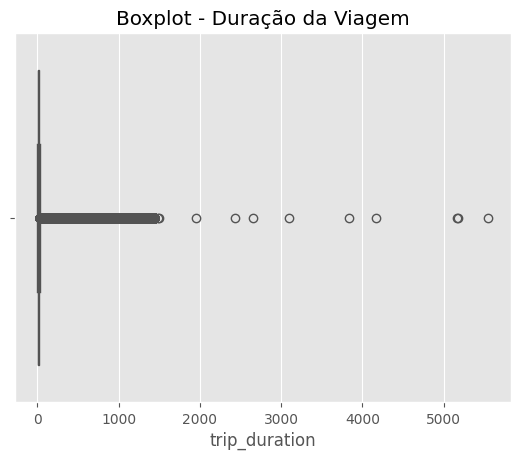

In [42]:
# Boxplot - Duração da Viagem
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot - Duração da Viagem')

*Não conseguimos absorver muitas informações, ainda temos muitos outliers*

* Como estão cada quartil?
* Que valor podemos considerar como outliers?
* Até quantos minutos podemos considerar como uma viagem normal?
* Podemos assumir uma régua para retirar valores outliers?

In [43]:
# Verificando a distribuição da coluna 'trip_duration'
q1 = df['trip_duration'].quantile(0.25)
q2 = df['trip_duration'].quantile(0.50) # Mediana
q3 = df['trip_duration'].quantile(0.75)
q_95p = df['trip_duration'].quantile(0.998) # 99,8% dos dados

print(f'Q1: {q1:.2f} min, Q2 (Mediana): {q2:.2f} min, Q3: {q3:.2f} min, Q_99,8%: {q_95p:.2f} min')

Q1: 6.37 min, Q2 (Mediana): 10.38 min, Q3: 16.50 min, Q_99,8%: 708.01 min


In [44]:
# Entendendo como uma viagem pode ter duração de até 1 hora em sua normalidade
outliers_duration = df['trip_duration'][df['trip_duration'] > q_95p].count()

print(f'Linhas removidas: {outliers_duration} | {outliers_duration / df.shape[0]:.2%}')

Linhas removidas: 12514 | 0.20%


In [45]:
df = df[df['trip_duration'] <= q_95p]

Text(0.5, 1.0, 'Boxplot - Duração da Viagem')

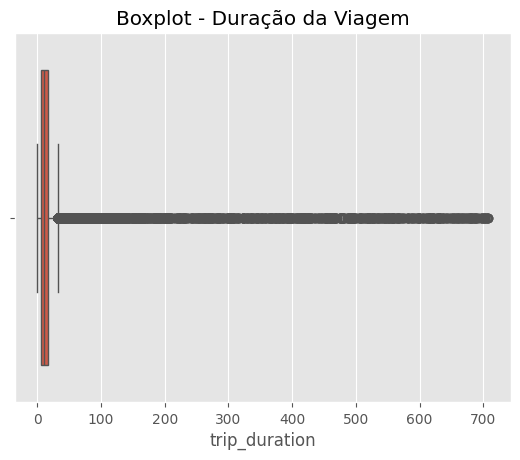

In [46]:
# Boxplot - Duração da Viagem
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot - Duração da Viagem')

Text(0.5, 1.0, 'Relação entre Distância e Valor Total da Viagem')

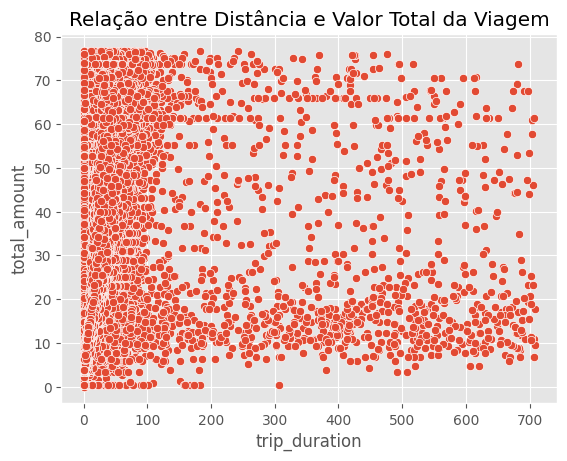

In [47]:
# Verificando possiveis outliers
# Análisando a relação Valor x Distância
sns.scatterplot(x='trip_duration', y='total_amount', data=df, palette='viridis')
plt.title('Relação entre Distância e Valor Total da Viagem')

#### Outliers - Quantidade de Passageiros

In [48]:
# Verificando possiveis outliers na coluna de passageiros
passenger = df['passenger_count'][df['passenger_count'] <= 0].count()
print(f'Quantidade de viagens com quantidade de passageiros menor ou igual a zero: {passenger}')

Quantidade de viagens com quantidade de passageiros menor ou igual a zero: 113038


In [49]:
# Removendo viagens com quantidade de passageiros menor ou igual a zero
df = df[df['passenger_count'] > 0]

Text(0.5, 1.0, 'Distribuição de passageiros')

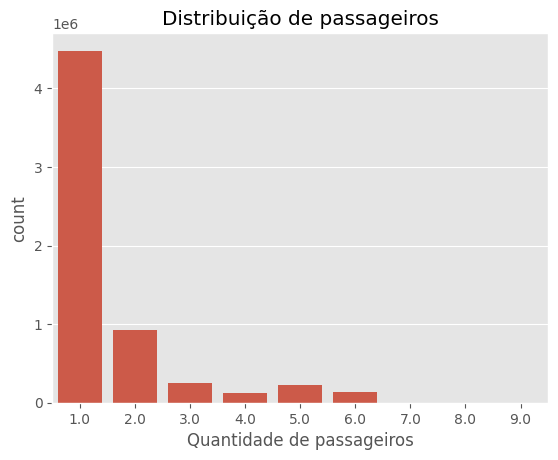

In [50]:
# Distribuição de passageiros
pivot = df['passenger_count'].value_counts().reset_index()
pivot.columns = ['passenger_count', 'count']
pivot

sns.barplot(x='passenger_count', y='count', data=pivot)
plt.xlabel('Quantidade de passageiros')
plt.title('Distribuição de passageiros')

#### Outliers - Distância da Viagem

In [51]:
# Verificando possiveis outliers na coluna de distância da viagem
trip_distance = df['trip_distance'][df['trip_distance'] <= 0].count()
print(f'Quantidade de viagens com distância menor ou igual a zero: {trip_distance}')

Quantidade de viagens com distância menor ou igual a zero: 50447


In [52]:
# Removendo viagens com distância menor ou igual a zero
df = df[df['trip_distance'] > 0]

Text(0.5, 1.0, 'Boxplot - Distância da Viagem')

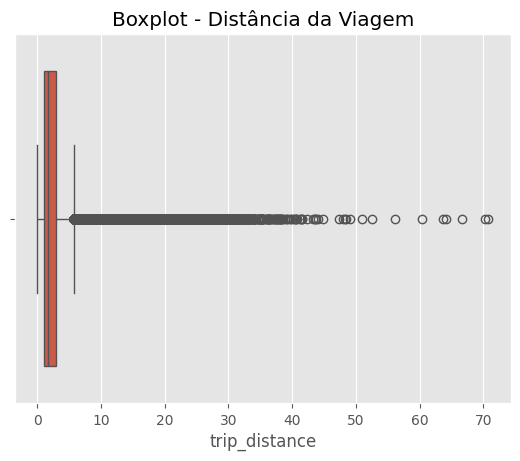

In [53]:
# Boxplot - Distância da Viagem
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot - Distância da Viagem')

*Podemos ver que ainda temos muitos outliers*

* Como estão cada quartil?
* Que valor podemos considerar como outliers?
* Até quantos minutos podemos considerar como uma viagem normal?
* Podemos assumir uma régua para retirar valores outliers?

In [54]:
# Verificando a distribuição da coluna 'trip_duration'
q1 = df['trip_distance'].quantile(0.25)  # Primeiro quartil (Q1)
q2 = df['trip_distance'].quantile(0.50)  # Segundo quartil (Q2) - Mediana
q3 = df['trip_distance'].quantile(0.75)  # Terceiro quartil (Q3)
q_99p = df['trip_distance'].quantile(0.995)  # 99% dos dados

print(f'Q1: {q1:.2f}, Q2 (Mediana): {q2:.2f}, Q3: {q3:.2f}, 99,5%: {q_99p:.2f}')

Q1: 0.98, Q2 (Mediana): 1.60, Q3: 2.87, 99,5%: 19.65


In [55]:
# Entendendo como uma viagem pode ter distancia de até 25 milhas em sua normalidade
outliers_duration = df['trip_distance'][df['trip_distance'] > 20].count()

print(f'Linhas com distancia mais que 30 milhas: {outliers_duration} | {outliers_duration / df.shape[0]:.2%}')

Linhas com distancia mais que 30 milhas: 24860 | 0.41%


In [56]:
# Removendo viagens com distância maior que 50 milhas
df = df[df['trip_distance'] <= 20]

Text(0.5, 1.0, 'Boxplot - Distância da Viagem - Após Limpeza')

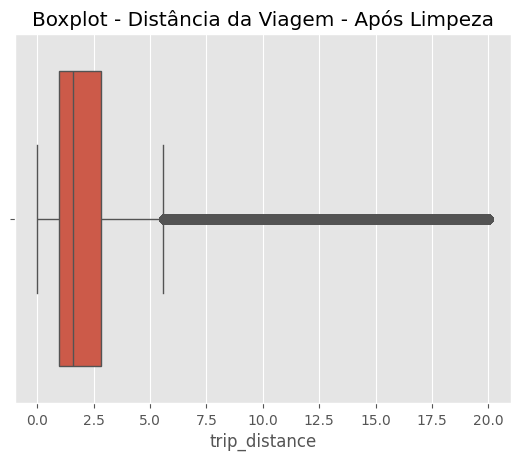

In [57]:
# Boxplot - Distância da Viagem
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot - Distância da Viagem - Após Limpeza')

#### Outliers - Gorjeta

In [58]:
# Verificando possiveis outliers na coluna de gorjeta
amount = df['tip_amount'][df['tip_amount'] < 0].count()
print(f'Quantidade de gorjetas com valores negativos: {amount}')

Quantidade de gorjetas com valores negativos: 0


Text(0.5, 1.0, 'Boxplot - Valor de Gorjeta')

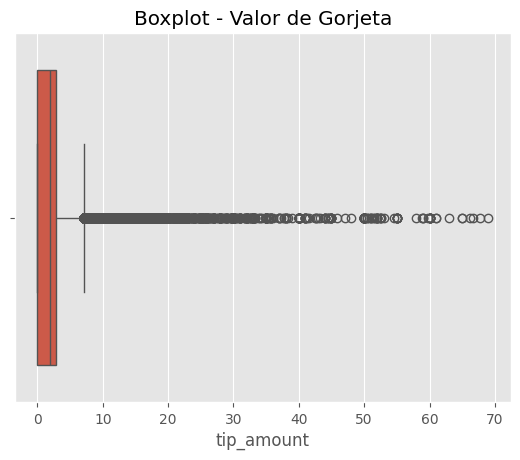

In [59]:
# Boxplot - Valor de Gorjetas
sns.boxplot(x=df['tip_amount'])
plt.title('Boxplot - Valor de Gorjeta')

### Validando a limpeza de dados
*Ainda podemos encontrar alguns outliers?*

* Quantas linhas foram removidas do dataset?
* Qual é a relação Valor x Distancia?
* Qual é a relação Valor x Duração?
* Qual é a relação Valor x Gorjeta?


In [60]:
# Quantas linhas removemos
print(f' linhas removidas: {linhas_df_original - df.shape[0]} | {1 - (df.shape[0] / linhas_df_original):.2%}')

 linhas removidas: 444085 | 6.83%


In [61]:
# Análisando o minimo, máximo e média de algumas colunas
colunas = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'trip_duration', 'total_amount']

# Criando um loop para verificar os dados de cada coluna
for coluna in colunas:
    minimo = df[coluna].min()
    maximo = df[coluna].max()
    media = df[coluna].mean()
    mediana = df[coluna].median()
    moda = df[coluna].mode()[0]
    print(f'{coluna}: Mínimo: {minimo} | Máximo: {maximo} | Média: {media} | Mediana: {mediana} | Moda: {moda}')
    print('')


passenger_count: Mínimo: 1.0 | Máximo: 9.0 | Média: 1.5450223459213017 | Mediana: 1.0 | Moda: 1.0

trip_distance: Mínimo: 0.01 | Máximo: 20.0 | Média: 2.6804407079689874 | Mediana: 1.6 | Moda: 0.9

fare_amount: Mínimo: 0.01 | Máximo: 65.0 | Média: 11.786305679653701 | Mediana: 9.0 | Moda: 6.0

extra: Mínimo: 0.0 | Máximo: 33.75 | Média: 1.0796795381044761 | Mediana: 0.5 | Moda: 0.0

mta_tax: Mínimo: 0.0 | Máximo: 3.3 | Média: 0.49937343076975155 | Mediana: 0.5 | Moda: 0.5

tip_amount: Mínimo: 0.0 | Máximo: 69.0 | Média: 2.1016777894009406 | Mediana: 1.96 | Moda: 0.0

trip_duration: Mínimo: 0.016666666666666666 | Máximo: 707.9833333333333 | Média: 12.735675418165545 | Mediana: 10.35 | Moda: 6.5

total_amount: Mínimo: 0.31 | Máximo: 76.77 | Média: 17.61838336403334 | Mediana: 14.16 | Moda: 10.3



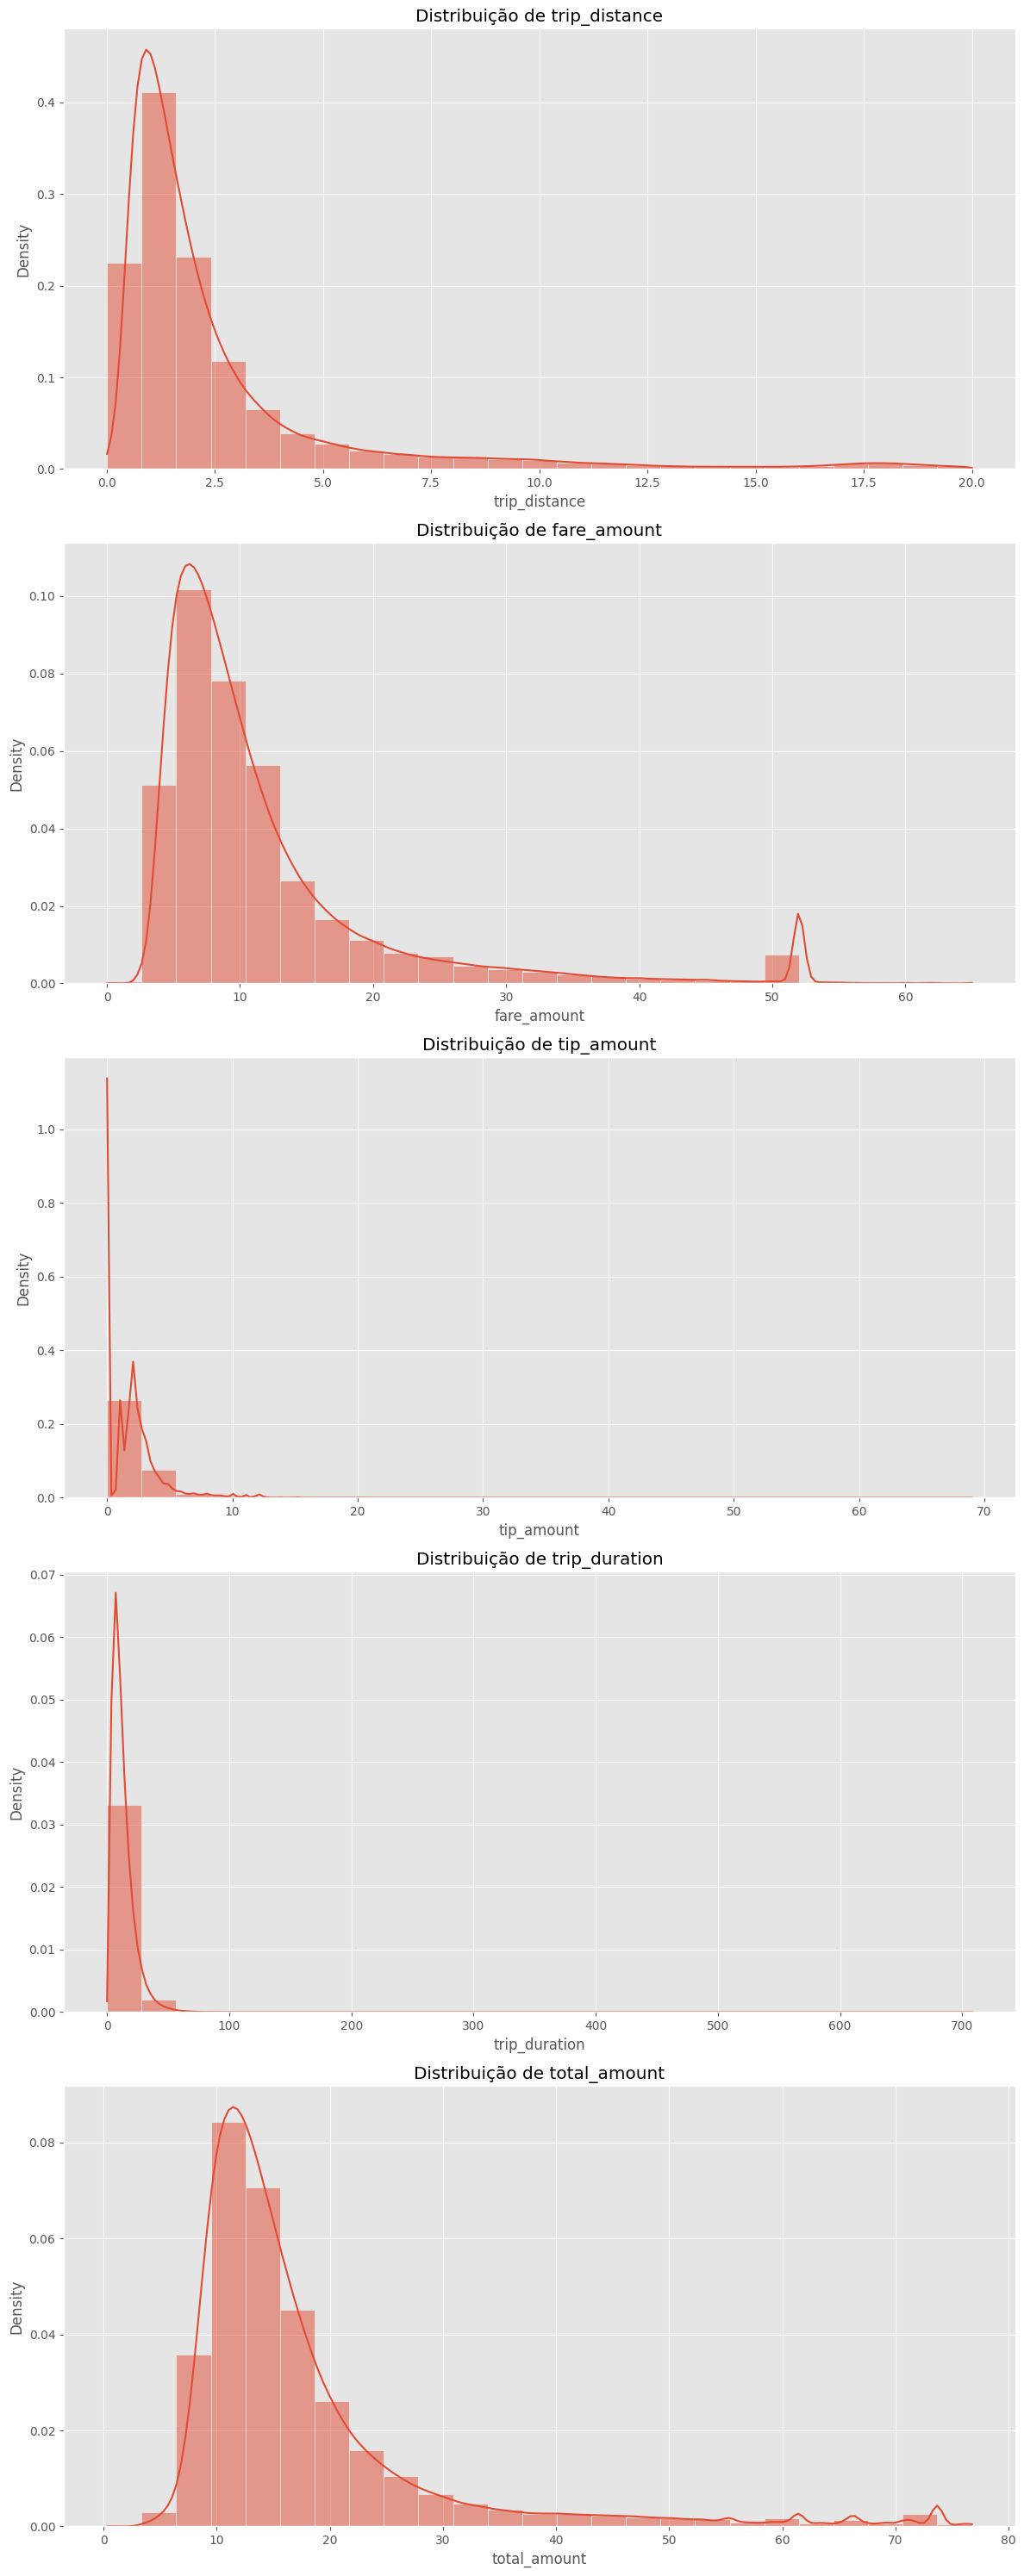

In [62]:
# Análisando a distribuição das colunas numéricas
colunas = ['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration', 'total_amount']

# Histograma das colunas numéricas
plt.figure(figsize=(12, 6 * len(colunas)))
for i, col in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)
    sns.histplot(df[col], kde=True, bins=25, stat='density')
    plt.title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relação entre Gorjeta e Valor Total da Viagem')

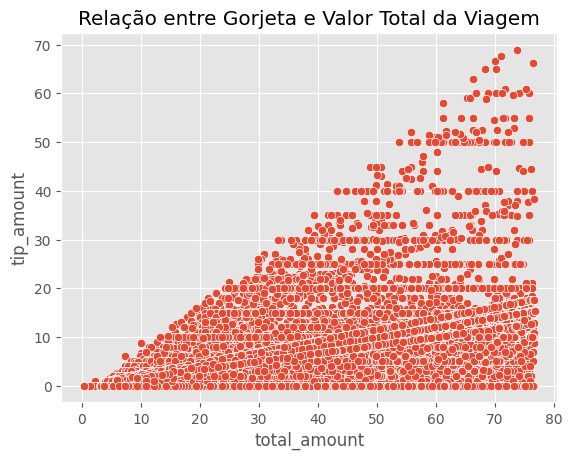

In [63]:
# Verificando possiveis outliers
# Análisando a relação Valor x Gorjeta
sns.scatterplot(x='total_amount', y='tip_amount', data=df)
plt.title('Relação entre Gorjeta e Valor Total da Viagem')

## EDA

*Principais dúvidas para explorar*

* Como é a distribuição por datas?
* A receita vária muito conforme o dia?
* Qual é a média por dia/dia_da_semana/hora?
* Qual é o dia com mais gorjetas?
* Existe alguma influência para maiores valores de gorjeta?
* Qual é o meio de pagamento mais utilizado?

### Primeiras Análises

In [64]:
# Criando uma cópia do dataframe para EDA
df_eda = df

In [65]:
df_eda.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,day,month,year,hour,weekday,tip
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000,1,1,2020,0,2,1
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667,1,1,2020,0,2,1
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333,1,1,2020,0,2,1
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000,1,1,2020,0,2,1
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,0,7,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.883333,1,1,2020,0,2,0


In [66]:
df_eda.dtypes

,0
VendorID,category
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,category
store_and_fwd_flag,category
PULocationID,int64
DOLocationID,int64
payment_type,category


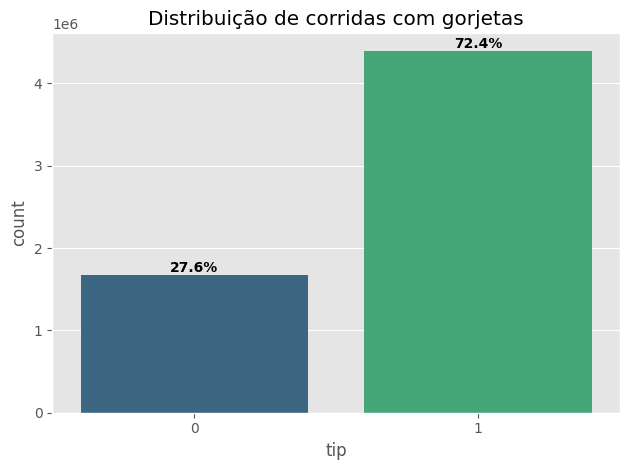

In [67]:
# Distribuição de corridas com gorjetas

ax = sns.countplot(x='tip', data=df_eda, palette='viridis')
ax.set_title('Distribuição de corridas com gorjetas')

total = len(df_eda)
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, count + 1, percent,
            ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



### Análisando a correlação dos dados

In [68]:
df_corr = df_eda[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'trip_duration', 'total_amount', 'tip']]
correlacao = df_corr.corr()

Text(0.5, 1.0, 'Correlação entre as variáveis numéricas')

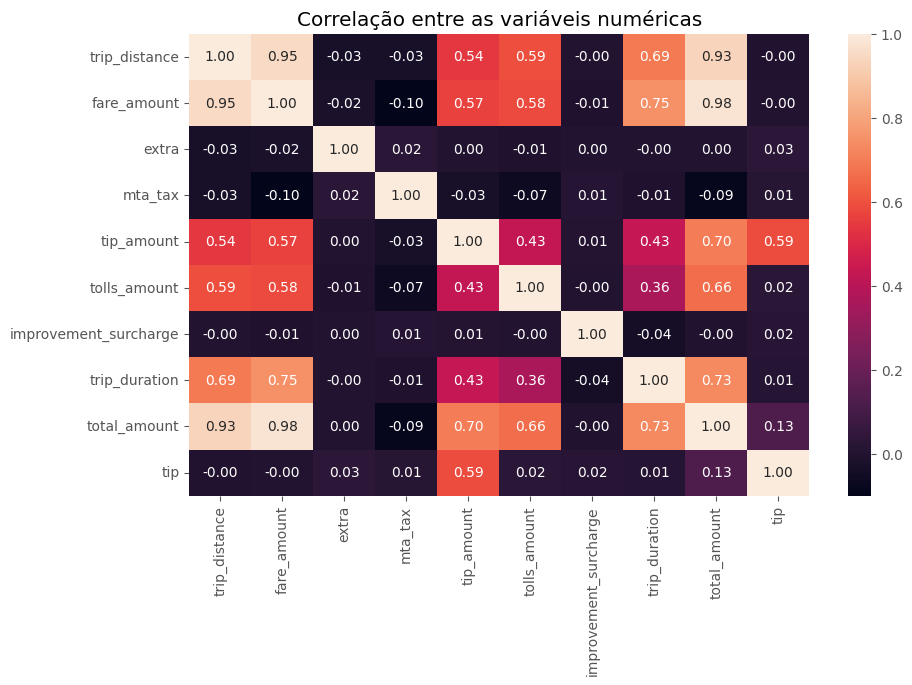

In [69]:
# Heatmap - Correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt='.2f')
plt.title('Correlação entre as variáveis numéricas')

Conseguimos ver uma boa correlação entre as colunas:
* Duração X Valor da Corrida
* Distancia X Valor da Corrida
* Gorjeta X Valor da Corrida

### Análisando a distribuição temporal

#### Distribuição por dia

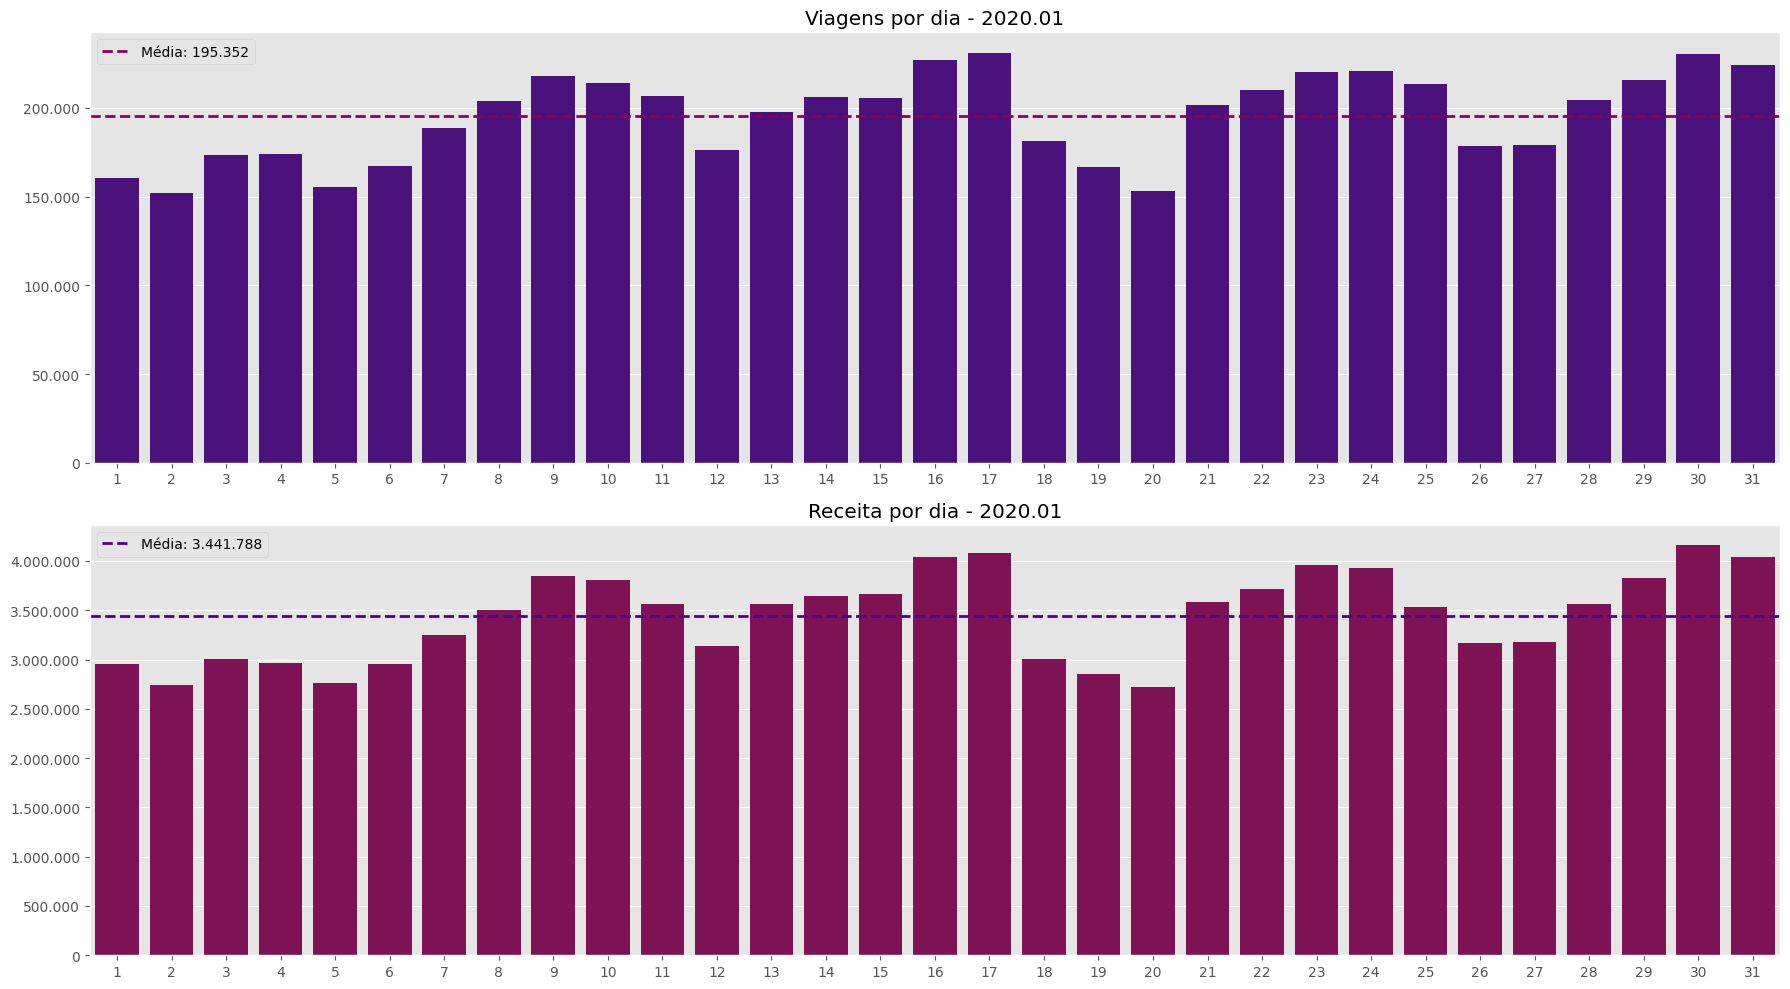

In [70]:
# Análisando a distribuição de viagens e receita por dia
pivot = pd.pivot_table(df_eda,
                    index='day',
                    values='total_amount',
                    aggfunc=['count', 'sum', 'mean'])
pivot.columns = ['travels_count', 'amount_sum', 'amount_mean']

# Criando subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Formatando os ticks do eixo y
def format_y_ticks(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# Viagens por dia
sns.barplot(x='day', y='travels_count', data=pivot, ax=axes[0], color='#4e008e')
axes[0].set_title('Viagens por dia - 2020.01')
axes[0].yaxis.set_major_formatter(format_y_ticks)
media = int(pivot['travels_count'].mean())
axes[0].axhline(media, color='#8F0059', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[0].legend()

# Receita por dia
sns.barplot(x='day', y='amount_sum', data=pivot, ax=axes[1], color='#8F0059')
axes[1].set_title('Receita por dia - 2020.01')
axes[1].yaxis.set_major_formatter(format_y_ticks)
media = int(pivot['amount_sum'].mean())
axes[1].axhline(media, color='#4e008e', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[1].legend()

# Removendo o title dos eixos
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()

#### Distribuição por dia da semana

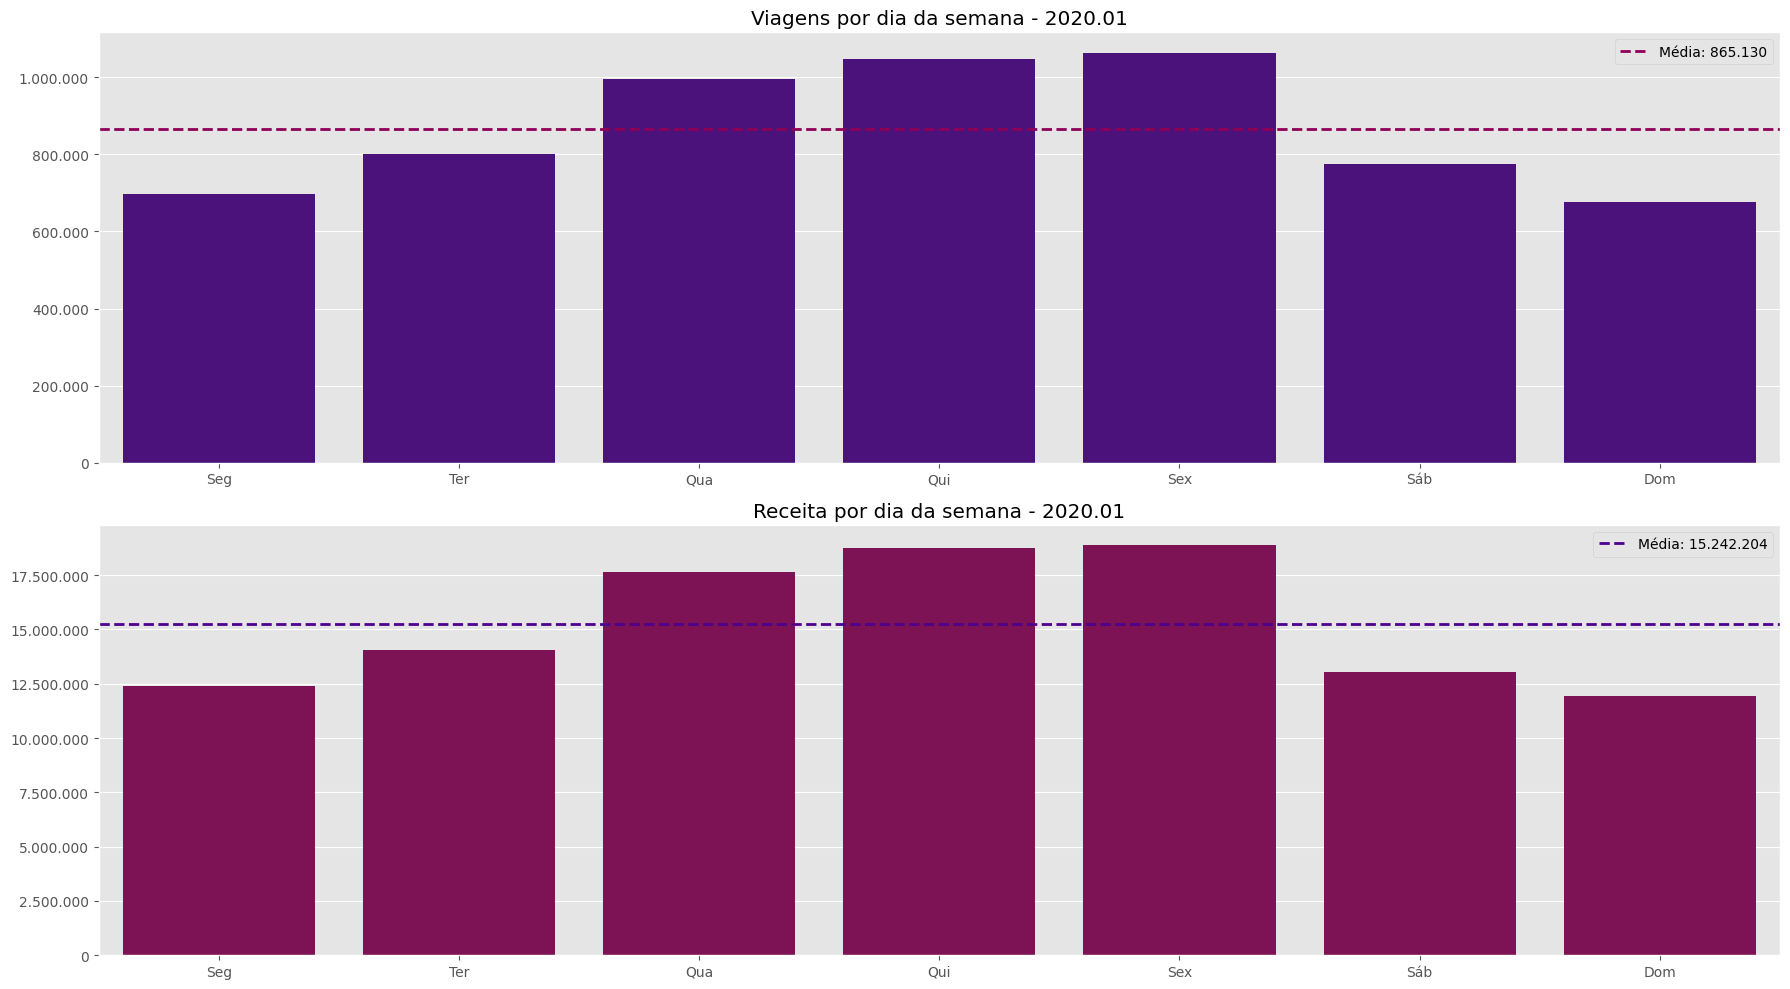

In [71]:
# Análisando a distribuição de viagens por dia da semana
pivot = pd.pivot_table(df_eda,
                    index='weekday',
                    values='total_amount',
                    aggfunc=['count', 'sum', 'mean'])
pivot.columns = ['travels_count', 'amount_sum', 'amount_mean']

dict_dia_da_semana = {
    0: 'Seg',
    1: 'Ter',
    2: 'Qua',
    3: 'Qui',
    4: 'Sex',
    5: 'Sáb',
    6: 'Dom'
}

pivot = pivot.rename(index=dict_dia_da_semana)

# Criando subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Formatando os ticks do eixo y
def format_y_ticks(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# Viagens por dia da semana
sns.barplot(x='weekday', y='travels_count', data=pivot, ax=axes[0], color='#4e008e')
axes[0].set_title('Viagens por dia da semana - 2020.01')
axes[0].yaxis.set_major_formatter(format_y_ticks)
media = int(pivot['travels_count'].mean())
axes[0].axhline(media, color='#8F0059', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[0].legend()

# Receita por dia da semana
sns.barplot(x='weekday', y='amount_sum', data=pivot, ax=axes[1], color='#8F0059')
axes[1].set_title('Receita por dia da semana - 2020.01')
axes[1].yaxis.set_major_formatter(format_y_ticks)
media = int(pivot['amount_sum'].mean())
axes[1].axhline(media, color='#4e008e', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[1].legend()

# Removendo o title dos eixos
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajutando o layout
plt.tight_layout()
plt.show()

#### Distribuição por hora

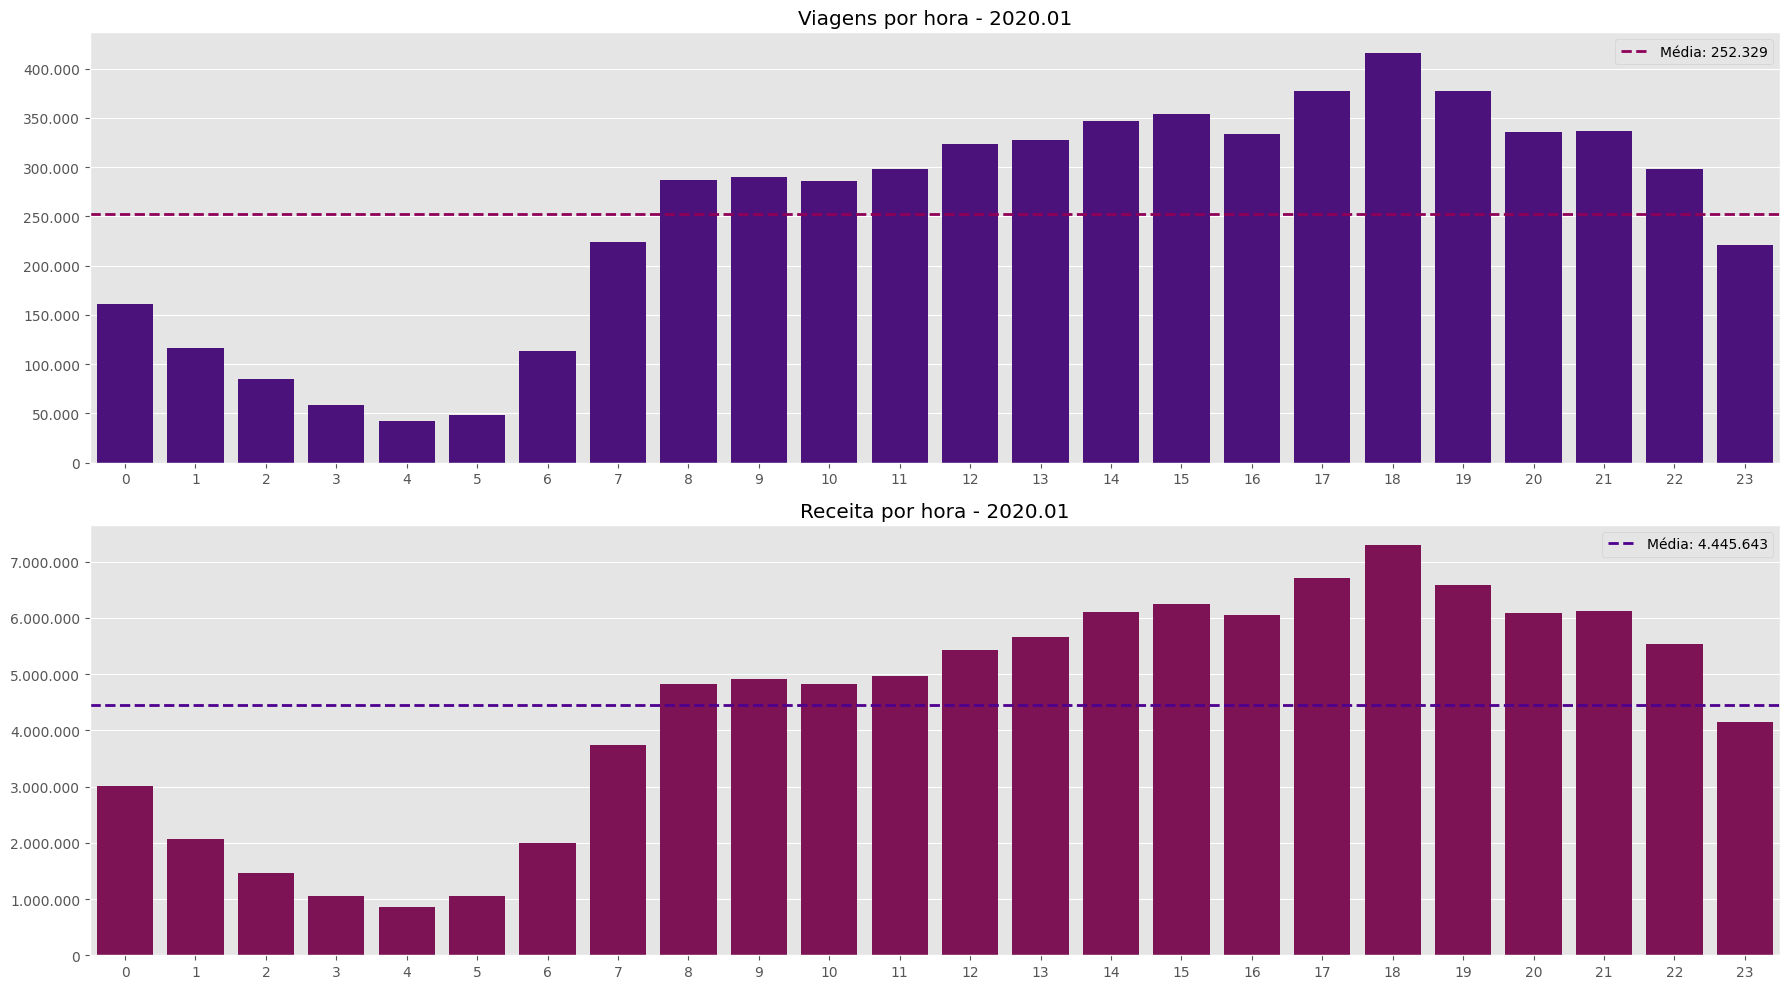

In [72]:
# Análisando a distribuição de viagens por hora
pivot = pd.pivot_table(df_eda,
                    index='hour',
                    values='total_amount',
                    aggfunc=['count', 'sum', 'mean'])
pivot.columns = ['travels_count', 'amount_sum', 'amount_mean']

# Análisando a distribuição de viagens e receita por hora
# Criando subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Formatando os ticks do eixo y
def format_y_ticks(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# Viagens por hora
sns.barplot(x='hour', y='travels_count', data=pivot, ax=axes[0], color='#4e008e')
axes[0].set_title('Viagens por hora - 2020.01')
axes[0].yaxis.set_major_formatter(format_y_ticks)
media = int(pivot['travels_count'].mean())
axes[0].axhline(media, color='#8F0059', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[0].legend()

# Receita por hora
sns.barplot(x='hour', y='amount_sum', data=pivot, ax=axes[1], color='#8F0059')
axes[1].set_title('Receita por hora - 2020.01')
axes[1].yaxis.set_major_formatter(format_y_ticks)
media = int(pivot['amount_sum'].mean())
axes[1].axhline(media, linestyle='dashed', color='#4e008e', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[1].legend()

# Removendo o title dos eixos
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustando o layout
plt.tight_layout()
plt.show()

### Análisando as gorjetas das corridas

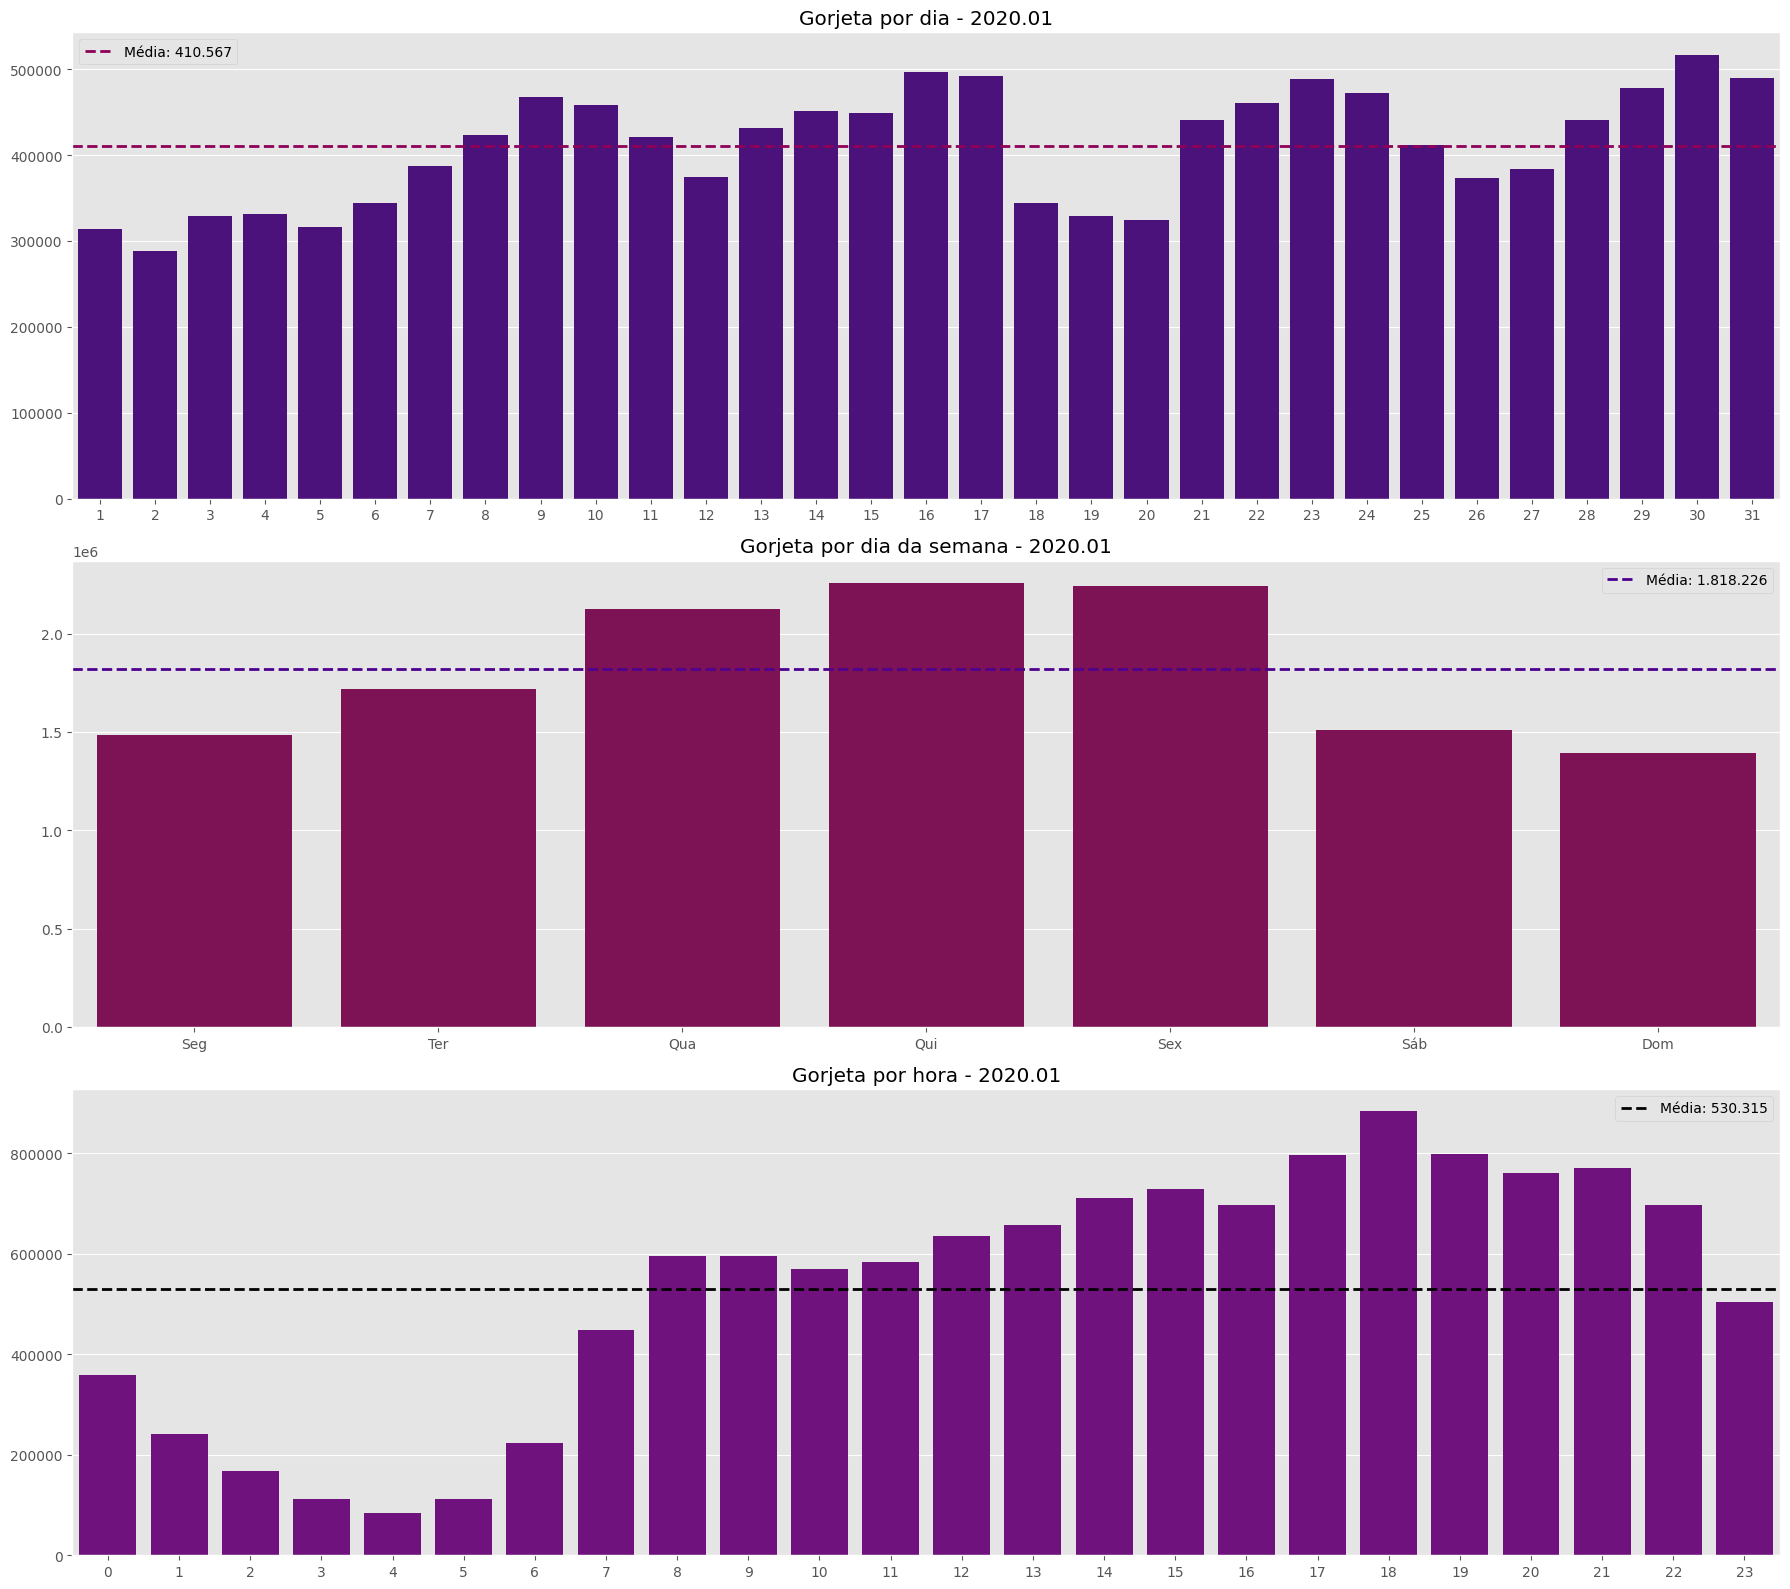

In [73]:
# GORJETA MÉDIA POR DIA, DIA DA SEMANA E HORA
# Criando subplots para analisar a distribuição de viagens por dia, dia da semana e hora
fig, axes = plt.subplots(3, 1, figsize=(18, 16))

# Distribuição de gorjeta por dia
pivot = pd.pivot_table(df_eda, index='day', values='tip_amount', aggfunc='sum')
sns.barplot(x='day', y='tip_amount', data=pivot, ax=axes[0], color='#4e008e')
axes[0].set_title('Gorjeta por dia - 2020.01')
media = int(pivot['tip_amount'].mean())
axes[0].axhline(media, color='#8F0059', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[0].legend()

# Distribuição de gorjeta por dia da semana
pivot = pd.pivot_table(df_eda, index='weekday', values='tip_amount', aggfunc='sum')
pivot = pivot.rename(index=dict_dia_da_semana)
sns.barplot(x='weekday', y='tip_amount', data=pivot, ax=axes[1], color='#8F0059')
axes[1].set_title('Gorjeta por dia da semana - 2020.01')
media = int(pivot['tip_amount'].mean())
axes[1].axhline(media, color='#4e008e', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[1].legend()

# Distribuição de gorjeta por hora
pivot = pd.pivot_table(df_eda, index='hour', values='tip_amount', aggfunc='sum')
sns.barplot(x='hour', y='tip_amount', data=pivot, ax=axes[2], color='#7D008F')
axes[2].set_title('Gorjeta por hora - 2020.01')
media = int(pivot['tip_amount'].mean())
axes[2].axhline(media, color='#000', linestyle='dashed', linewidth=2, label=f'Média: {media:,}'.replace(",", "."))
axes[2].legend()

# Removendo o title dos eixos
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustando o layout
plt.tight_layout()
plt.show()

### Análisando os meios de pagamento

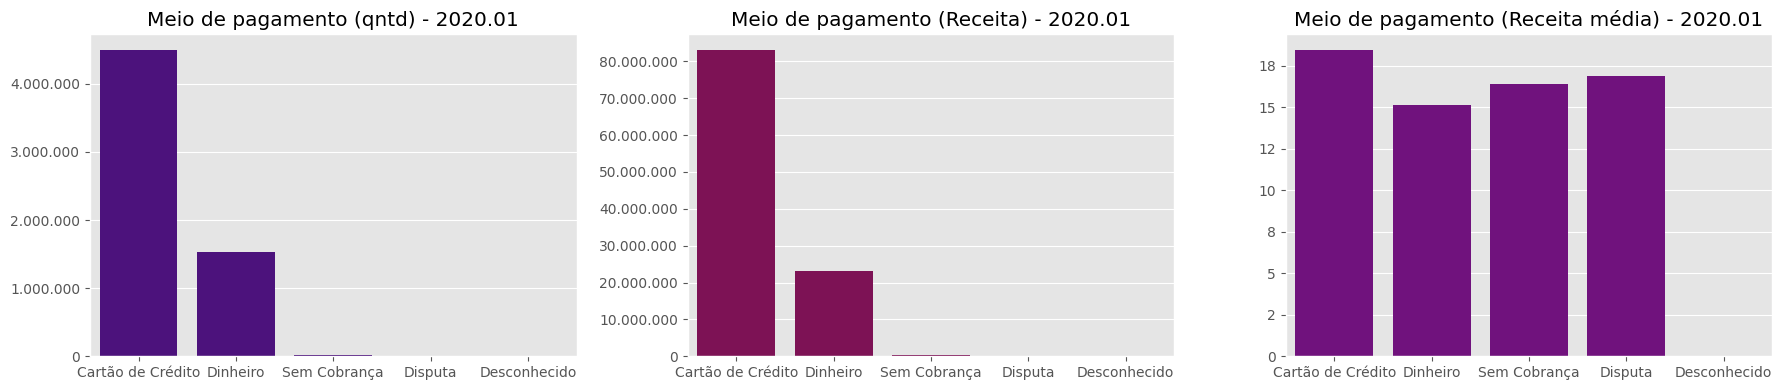

In [74]:
# Criando plot de meios de pagamento
pivot = pd.pivot_table(df_eda, index='payment_type', values='total_amount', aggfunc=['count', 'sum', 'mean'])
pivot.columns = ['payment_type_count', 'payment_type_sum', 'payment_type_mean']
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Formatando os ticks do eixo y
def format_y_ticks(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# Renomeando os meios de pagamento
dict_meio_de_pagamento = {
    1: 'Cartão de Crédito',
    2: 'Dinheiro',
    3: 'Sem Cobrança',
    4: 'Disputa',
    5: 'Desconhecido',
    6: 'Viagem cancelada'
}
pivot = pivot.rename(index=dict_meio_de_pagamento)

# Distribuição do meio de pagamento por quantidade
sns.barplot(x='payment_type', y='payment_type_count', data=pivot, ax=axes[0], color='#4e008e')
axes[0].set_title('Meio de pagamento (qntd) - 2020.01')
axes[0].yaxis.set_major_formatter(format_y_ticks)

# Distribuição do meio de pagamento por receita
sns.barplot(x='payment_type', y='payment_type_sum', data=pivot, ax=axes[1], color='#8F0059')
axes[1].set_title('Meio de pagamento (Receita) - 2020.01')
axes[1].yaxis.set_major_formatter(format_y_ticks)

# Distribuição do meio de pagamento por receita média
sns.barplot(x='payment_type', y='payment_type_mean', data=pivot, ax=axes[2], color='#7D008F')
axes[2].set_title('Meio de pagamento (Receita média) - 2020.01')
axes[2].yaxis.set_major_formatter(format_y_ticks)

# Removendo o title dos eixos
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustando o layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gorjetas por meio de pagamento')

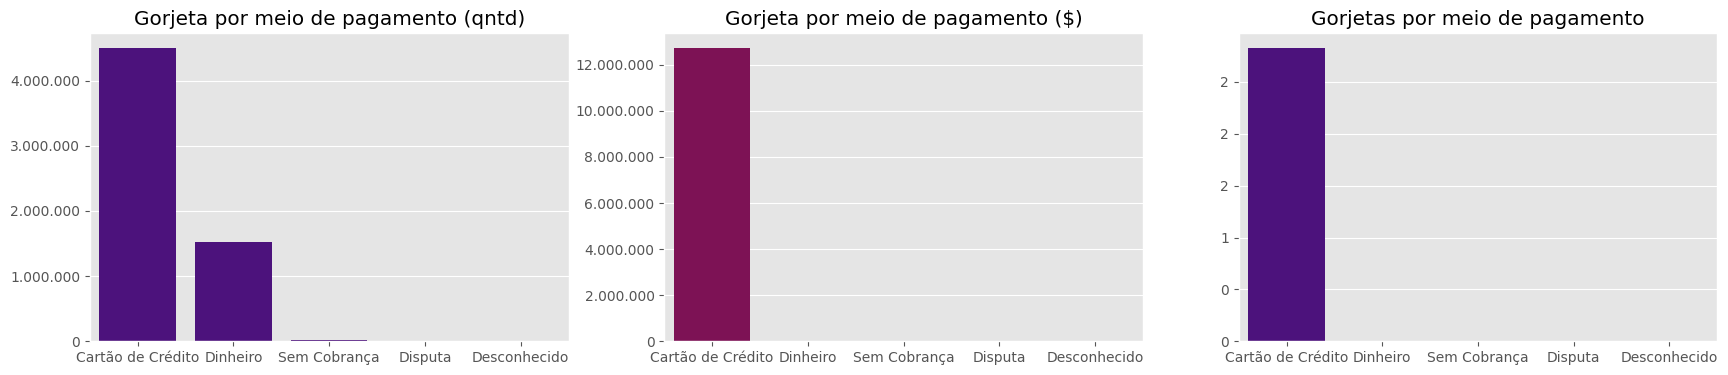

In [75]:
# Gorjetas por meio de pagamento
pivot_tip = pd.pivot_table(df_eda, index='payment_type', values='tip_amount', aggfunc=['count', 'mean', 'sum'])
pivot_tip.columns = ['tip_count', 'tip_mean', 'tip_sum']
pivot_tip = pivot_tip.rename(index=dict_meio_de_pagamento)

# Gráfico de barras
fig, axes = plt.subplots(1, 3, figsize=(21, 4))

# Distribuição de gorjeta (QTD) por meio de pagamento
sns.barplot(x='payment_type', y='tip_count', ax=axes[0], data=pivot_tip, color='#4e008e')
axes[0].set_title('Gorjeta por meio de pagamento (qntd)')
axes[0].yaxis.set_major_formatter(format_y_ticks)

# Distribuição de gorjeta ($) por meio de pagamento
sns.barplot(x='payment_type', y='tip_sum', ax=axes[1], data=pivot_tip, color='#8F0059')
axes[1].set_title('Gorjeta por meio de pagamento ($)')
axes[1].yaxis.set_major_formatter(format_y_ticks)

# Distribuição de gorjeta (Média) por meio de pagamento
sns.barplot(x='payment_type', y='tip_mean', ax=axes[2], data=pivot_tip, color='#4e008e')
axes[2].set_title('Gorjeta média por meio de pagamento')
axes[2].yaxis.set_major_formatter(format_y_ticks)

# Removendo o title dos eixos
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.title('Gorjetas por meio de pagamento')

In [76]:
print(pivot_tip)

                   tip_count  tip_mean      tip_sum
payment_type                                       
Cartão de Crédito    4500850  2.827731  12727193.35
Dinheiro             1528084  0.000183       280.28
Sem Cobrança           19633  0.004916        96.52
Disputa                 7348  0.001619        11.90
Desconhecido               0       NaN         0.00


###

### Análisando as colunas categóricas

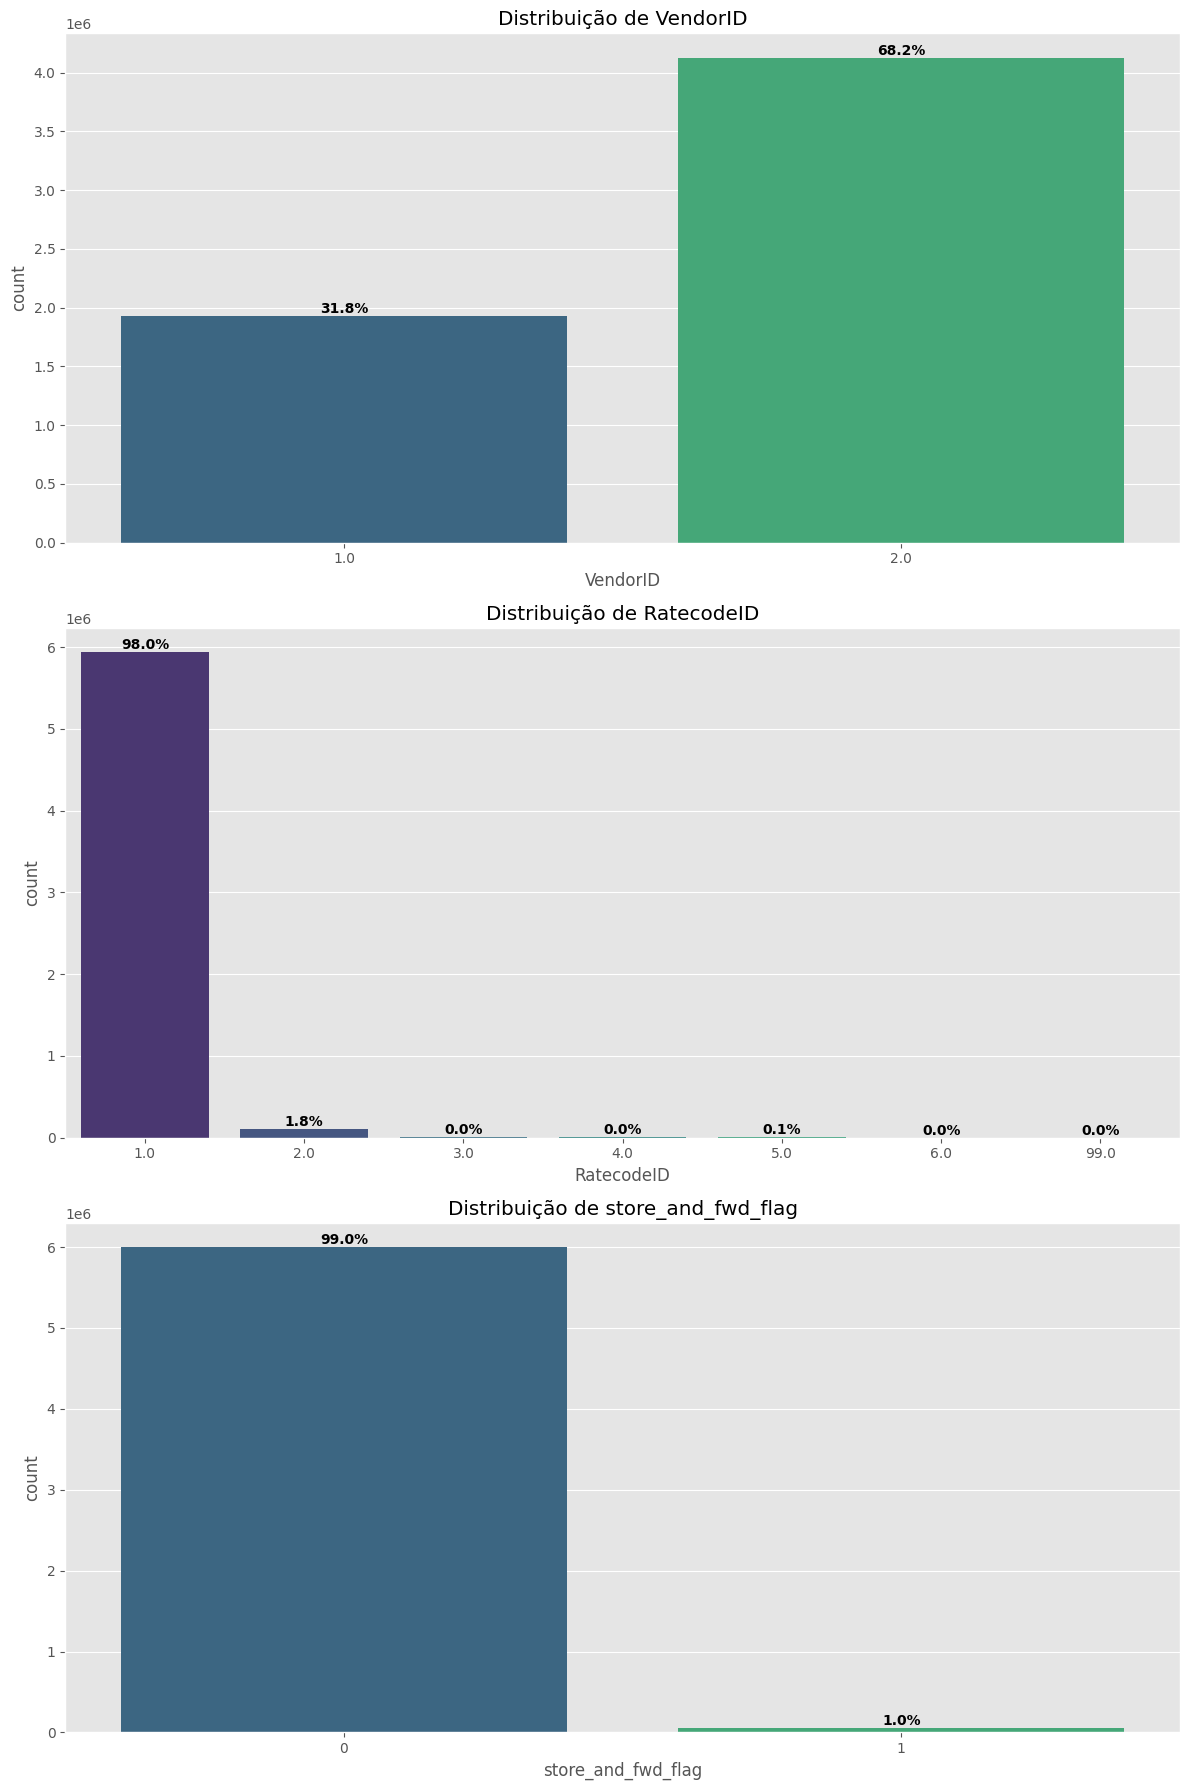

In [77]:
# Selecionando apenas as colunas categóricas
df_categorico = ['VendorID', 'RatecodeID', 'store_and_fwd_flag']

# Criando subplot para cada variável categórica
plt.figure(figsize=(12, 6 * len(df_categorico)))
for i, col in enumerate(df_categorico, 1):
    plt.subplot(len(df_categorico), 1, i)
    ax = sns.countplot(x=col, data=df_eda, palette='viridis')

    # Adicionar rótulos com porcentagem
    total = len(df_eda)
    for p in ax.patches:
        count = p.get_height()
        percent = f'{100 * count / total:.1f}%'
        ax.text(p.get_x() + p.get_width() / 2, count + 1, percent,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [78]:
df_eda.shape[0]

6055915

## Modelo de Classificação - Propensão ao pagamento da gorjeta

### Preparando a base para treinamento e teste

In [79]:
 df.shape[0]

6055915

In [80]:
df_classificacao = df.copy()

In [81]:
df_classificacao.dtypes

,0
VendorID,category
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,category
store_and_fwd_flag,category
PULocationID,int64
DOLocationID,int64
payment_type,category


In [82]:
df_classificacao['tip'] = df_classificacao['tip'].astype(bool)

In [83]:
df_classificacao.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_duration', 'day', 'month',
       'year', 'hour', 'weekday', 'tip'],
      dtype='object')

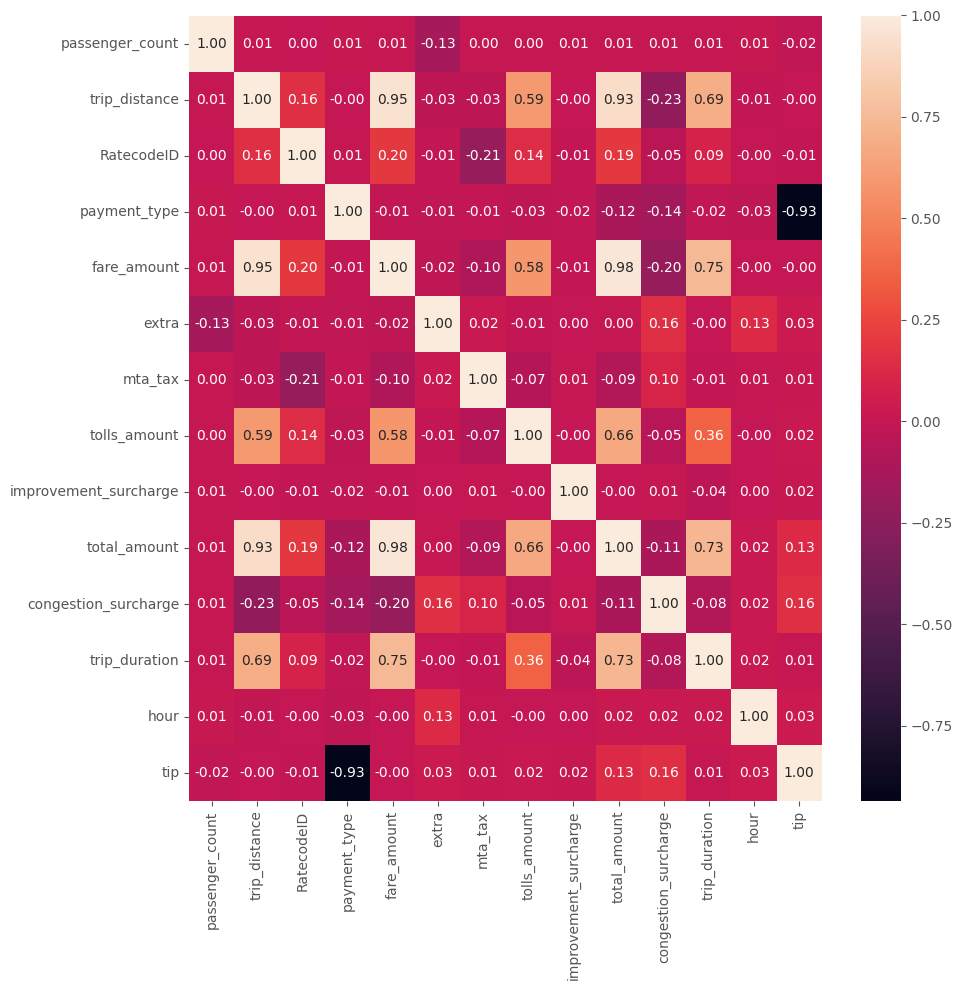

In [84]:
correlação = df_classificacao[['passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_duration', 'hour', 'tip']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlação, annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

In [85]:
X = df_classificacao[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'total_amount', 'tolls_amount', 'improvement_surcharge', 'trip_duration']]
y = df_classificacao['tip']
# Converter a variável alvo se for categórica
y = LabelEncoder().fit_transform(y)

In [86]:
# Balanceando a base, para distribuir por igual a quantidade de Gorjetas pagas e não pagas
# Equilibrando a representação da Target Feature
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())  # Ver distribuição após SMOTE

1    4387383
0    4387383
Name: count, dtype: int64


### Regressão Linear

In [87]:
# Separando as bases para treinamento e teste
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

Acurácia: 0.9576524352024556
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96   1316886
           1       0.97      0.94      0.96   1315544

    accuracy                           0.96   2632430
   macro avg       0.96      0.96      0.96   2632430
weighted avg       0.96      0.96      0.96   2632430



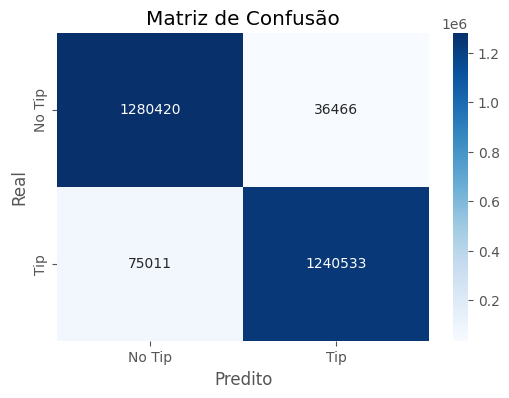

In [88]:
# Criando o modelo de Regressão Lógica
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo as previsões
y_pred = model.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [89]:
# Testando se houve overfitting
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Acurácia no treino: {train_acc:.4f}")
print(f"Acurácia no teste: {test_acc:.4f}")

Acurácia no treino: 0.9574
Acurácia no teste: 0.9577


### Árvore de Decisão

Acurácia: 0.82
Relatório de Classificação do teste:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57    500605
           1       0.82      0.96      0.88   1316170

    accuracy                           0.82   1816775
   macro avg       0.81      0.70      0.73   1816775
weighted avg       0.82      0.82      0.80   1816775



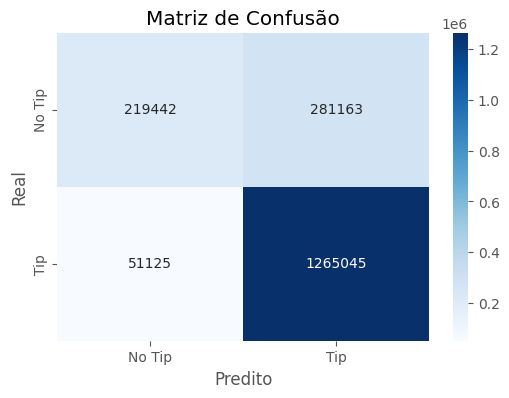

In [90]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar a árvore de decisão
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("Relatório de Classificação do teste:\n", classification_report(y_test, y_pred))

# Criar e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [91]:
# Testando se houve overfitting
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Acurácia no treino: {train_acc:.4f}")
print(f"Acurácia no teste: {test_acc:.4f}")

Acurácia no treino: 0.8172
Acurácia no teste: 0.8171
